In [1]:
import pandas as pd
import seaborn as sns
import  numpy as np
import shap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import datetime
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import random
import shutil
from openpyxl import load_workbook
from PIL import Image

C:\Users\pp01880\AppData\Local\Temp\ipykernel_16364\3803328042.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Randomize OKs

In [2]:


origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\OK'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\OK'
numero_imagens = 1000

imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

#diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpe o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Copie as imagens selecionadas para o diretório de destino
error_images = []
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    imagem_destino = os.path.join(destino, imagem)
    try:
        shutil.copy(imagem_path, imagem_destino)
    except Exception as e:
        print(f"Error copying {imagem_path}: {e}")
        error_images.append(imagem_path)

print(f"{numero_imagens - len(error_images)} imagens copiadas com sucesso para {destino}")
if error_images:
    print("Images with errors:")
    for img in error_images:
        print(img)

1000 imagens copiadas com sucesso para C:\Users\pp01880\ML\Algo\LabeledCartografia\OK


Randomize Defeitos US

In [3]:
origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\DefeitoUS'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\DefeitoUS'
numero_imagens = 740


imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

#diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpe o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Copie as imagens selecionadas para o diretório de destino
error_images = []
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    imagem_destino = os.path.join(destino, imagem)
    try:
        shutil.copy(imagem_path, imagem_destino)
    except Exception as e:
        print(f"Error copying {imagem_path}: {e}")
        error_images.append(imagem_path)

print(f"{numero_imagens - len(error_images)} imagens copiadas com sucesso para {destino}")
if error_images:
    print("Images with errors:")
    for img in error_images:
        print(img)

740 imagens copiadas com sucesso para C:\Users\pp01880\ML\Algo\LabeledCartografia\DefeitoUS


Randomize Profundidade

In [4]:
origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\Profundidade'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\Profundidade'
numero_imagens = 700



imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

#diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpe o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Configurações de data augmentation
data_augmentation = ImageDataGenerator(horizontal_flip=True)

# Copiar imagens selecionadas para o diretório de destino com data augmentation
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    
    # Ler a imagem
    img = tf.keras.preprocessing.image.load_img(imagem_path)
    x = tf.keras.preprocessing.image.img_to_array(img)
    
    # Remodelar para o formato (1, altura, largura, canais)
    x = x.reshape((1,) + x.shape)
    
    # Gerar imagens com data augmentation e salvar no diretório de destino
    i = 0
    for batch in data_augmentation.flow(x, batch_size=64, save_to_dir=destino, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= 2:  # Defina o número de imagens aumentadas desejadas (aqui é 2)
            break

print(f"{numero_imagens} imagens copiadas com sucesso para {destino} com data augmentation horizontal.")

558 imagens copiadas com sucesso para C:\Users\pp01880\ML\Algo\LabeledCartografia\Profundidade com data augmentation horizontal.


Randomize Recobrimento

In [5]:
origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\Recobrimento'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\Recobrimento'
numero_imagens = 750


imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

#diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpe o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Copie as imagens selecionadas para o diretório de destino
error_images = []
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    imagem_destino = os.path.join(destino, imagem)
    try:
        shutil.copy(imagem_path, imagem_destino)
    except Exception as e:
        print(f"Error copying {imagem_path}: {e}")
        error_images.append(imagem_path)

print(f"{numero_imagens - len(error_images)} imagens copiadas com sucesso para {destino}")
if error_images:
    print("Images with errors:")
    for img in error_images:
        print(img)

750 imagens copiadas com sucesso para C:\Users\pp01880\ML\Algo\LabeledCartografia\Recobrimento


Randomize Colagem

origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\Colagem'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\Colagem'
numero_imagens = 140


imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

#diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpe o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Copie as imagens selecionadas para o diretório de destino
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    imagem_destino = os.path.join(destino, imagem)
    shutil.copy(imagem_path, imagem_destino)

print(f"{numero_imagens} imagens copiadas com sucesso para {destino}")

In [6]:
origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\Colagem'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\Colagem'
numero_imagens = 345

# Lista de imagens na pasta de origem
imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

# Diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpar o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Configurações de data augmentation
data_augmentation = ImageDataGenerator(horizontal_flip=True)

# Copiar imagens selecionadas para o diretório de destino com data augmentation
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    
    # Ler a imagem
    img = tf.keras.preprocessing.image.load_img(imagem_path)
    x = tf.keras.preprocessing.image.img_to_array(img)
    
    # Remodelar para o formato (1, altura, largura, canais)
    x = x.reshape((1,) + x.shape)
    
    # Gerar imagens com data augmentation e salvar no diretório de destino
    i = 0
    for batch in data_augmentation.flow(x, batch_size=32, save_to_dir=destino, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= 2:  # Defina o número de imagens aumentadas desejadas (aqui é 2)
            break

print(f"{numero_imagens} imagens copiadas com sucesso para {destino} com data augmentation horizontal.")

345 imagens copiadas com sucesso para C:\Users\pp01880\ML\Algo\LabeledCartografia\Colagem com data augmentation horizontal.


In [7]:
origem = r'C:\Users\pp01880\ML\Imagens que nao vao ser categorizadas\Erro_ leituraUS'
destino = r'C:\Users\pp01880\ML\Algo\LabeledCartografia\Erro_ leituraUS'
numero_imagens = 400

# Lista de imagens na pasta de origem
imagens = os.listdir(origem)
random.shuffle(imagens)
numero_imagens = min(numero_imagens, len(imagens))

# Diretório de destino
if not os.path.exists(destino):
    os.makedirs(destino)
else:
    # Limpar o diretório de destino, se já existir
    for arquivo in os.listdir(destino):
        arquivo_path = os.path.join(destino, arquivo)
        if os.path.isfile(arquivo_path):
            os.remove(arquivo_path)

# Configurações de data augmentation
data_augmentation = ImageDataGenerator(horizontal_flip=True)

# Copiar imagens selecionadas para o diretório de destino com data augmentation
for i in range(numero_imagens):
    imagem = imagens[i]
    imagem_path = os.path.join(origem, imagem)
    
    # Ler a imagem
    img = tf.keras.preprocessing.image.load_img(imagem_path)
    x = tf.keras.preprocessing.image.img_to_array(img)
    
    # Remodelar para o formato (1, altura, largura, canais)
    x = x.reshape((1,) + x.shape)
    
    # Gerar imagens com data augmentation e salvar no diretório de destino
    i = 0
    for batch in data_augmentation.flow(x, batch_size=32, save_to_dir=destino, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= 2:  # Defina o número de imagens aumentadas desejadas (aqui é 2)
            break

print(f"{numero_imagens} imagens copiadas com sucesso para {destino} com data augmentation horizontal.")

400 imagens copiadas com sucesso para C:\Users\pp01880\ML\Algo\LabeledCartografia\Erro_ leituraUS com data augmentation horizontal.


In [3]:
data_direct = r'C:\Users\pp01880\ML\Algo\LabeledCartografia'
image_exts= ['jpeg', 'png', 'jpg', 'bpmn']
labels = os.listdir(data_direct)
print(labels)

['Colagem', 'DefeitoUS', 'Erro_ leituraUS', 'Profundidade', 'Recobrimento']


In [4]:
data = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\pp01880\ML\Algo\LabeledCartografia',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=16,
    image_size=(600, 800),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 3982 files belonging to 5 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

Images represented as numpy arrays (batch)

In [6]:
batch = data_iterator.next()
batch[1]


array([1, 3, 2, 3, 3, 4, 2, 2, 3, 3, 4, 3, 2, 1, 4, 4])

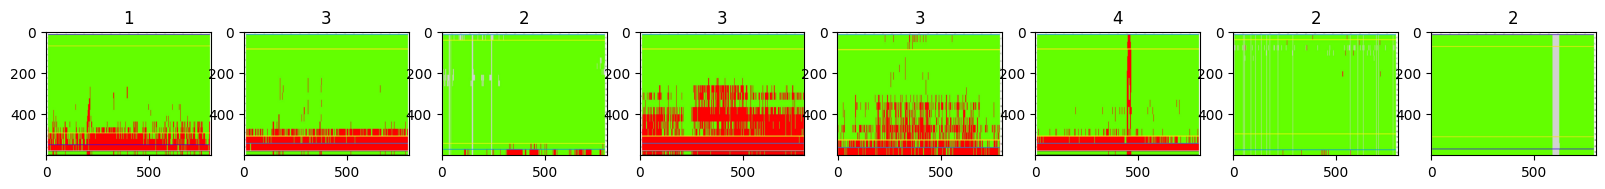

In [7]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

-Preprocess data.
Onde se realiza o scaling de 0-255 para 0-1.
onde se realiza o split da data para nao overfiting

In [8]:
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()


In [9]:
batch = scaled_iterator.next()

In [10]:
batch[0].max()

1.0

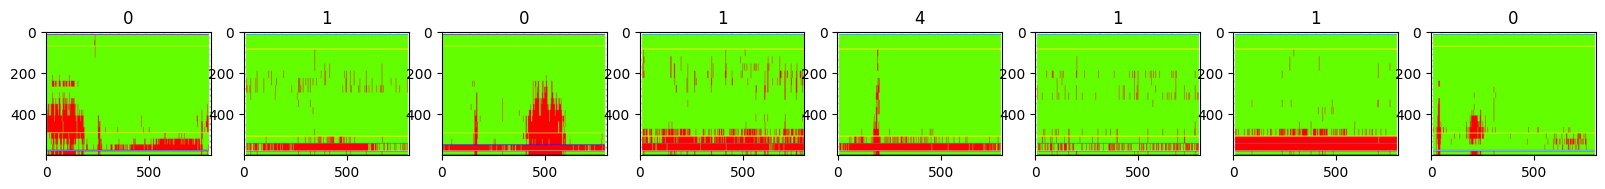

In [11]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split Model:

In [12]:
len(data)

249

In [13]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)

In [14]:
print('Size of data:', len(data))
print('Train Size:', train_size)
print('Validation Size:', val_size)
print('Test Size:', test_size)

Size of data: 249
Train Size: 174
Validation Size: 50
Test Size: 24


defining partitions

In [15]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Learning

1º build DL Model

In [ ]:
import os
import optuna
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = r'C:\Users\pp01880\ML\Algo\models\CNNbestalgotest53.h5'
loaded_model = load_model(model_path)

# Define a function to create and compile the model
def create_model(trial):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(500, 700, 3)),  # Adjust input shape as per your images
        tf.keras.layers.Dense(units=trial.suggest_int('units', 32, 512, log=True), activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # Adjust output units based on your problem
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the objective function for Optuna
def objective(trial):
    # Load and preprocess data
    data_direct = r'C:\Users\pp01880\ML\Algo\LabeledCartografia'
    train_data = tf.keras.utils.image_dataset_from_directory(
        data_direct,
        labels='inferred',
        label_mode='int',
        class_names=None,
        color_mode='rgb',
        batch_size=16,
        image_size=(000, 700),
        shuffle=True,
        seed=42,  # Add a seed value for shuffling
        validation_split=0.2,
        interpolation='bilinear',
        subset='training'  # Specify the subset as 'training'
    )

    val_data = tf.keras.utils.image_dataset_from_directory(
        data_direct,
        labels='inferred',
        label_mode='int',
        class_names=None,
        color_mode='rgb',
        batch_size=16,
        image_size=(500, 700),
        shuffle=True,
        seed=42,  # Use the same seed value as for the training data
        validation_split=0.2,
        interpolation='bilinear',
        subset='validation'  # Specify the subset as 'validation'
    )

    # Create the model
    model = create_model(trial)
    
    # Train the model
    model.fit(train_data, validation_data=val_data, epochs=5, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
    
    # Evaluate the model
    score = model.evaluate(val_data)
    return score[1]  # Return validation accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
best_trial = study.best_trial
print(f"Best trial - Accuracy: {best_trial.value}, Params: {best_trial.params}")



In [16]:
model = Sequential()

In [35]:
model.add(Conv2D(8,(3,3), 1, activation='relu', input_shape=(500, 700,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(6, activation='softmax'))


In [17]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(600, 800,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(rate=0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(5, activation='softmax'))

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [18]:
model.compile(optimizer='Adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 598, 798, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 299, 399, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 297, 397, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 148, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 146, 196, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 73, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 71, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 35, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 33, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 23552)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23552)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,014,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,057,509 (11.66 MB)

 Trainable params: 3,057,509 (11.66 MB)

 Non-trainable params: 0 (0.00 B)

2º Train model and validation

In [20]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=r'C:\Users\pp01880\ML\Algo\callback')

In [21]:
hist = model.fit(train, epochs=100, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.6770 - loss: 1.2191 - val_accuracy: 0.8963 - val_loss: 0.5143
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9124 - loss: 0.4933 - val_accuracy: 0.9187 - val_loss: 0.4725
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9321 - loss: 0.4349 - val_accuracy: 0.9300 - val_loss: 0.4307
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9466 - loss: 0.4025 - val_accuracy: 0.9463 - val_loss: 0.3389
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9487 - loss: 0.3526 - val_accuracy: 0.9250 - val_loss: 0.4338
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9555 - loss: 0.3813 - val_accuracy: 0.9563 - val_loss: 0.3965
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9651 - loss: 0.3437 - val_accuracy: 0.9425 - val_loss: 0.3423
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9389 - loss: 0.4381 - 

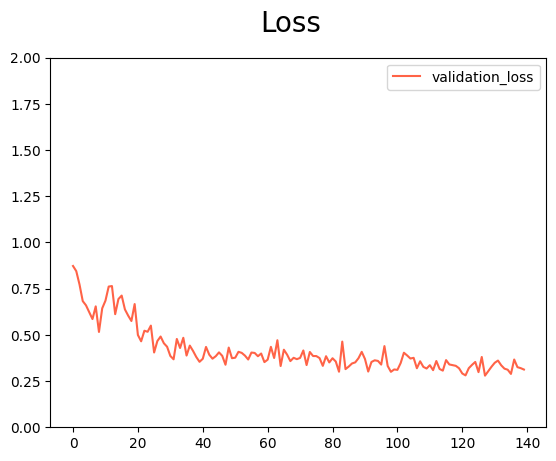

In [41]:
vloss = hist.history['val_loss']
fig = plt.figure()
#plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='tomato', label='validation_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.ylim(0,2)
plt.show()


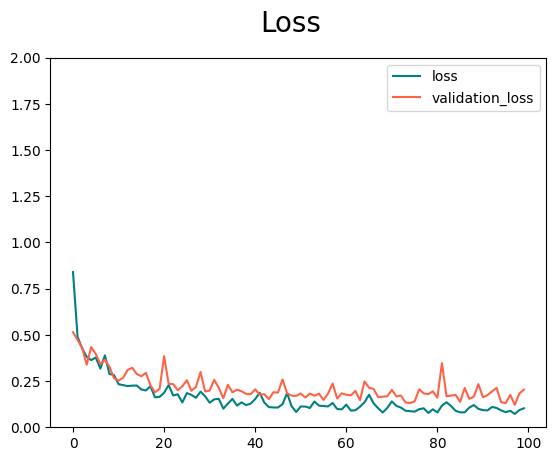

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='tomato', label='validation_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.ylim(0,2)
plt.show()

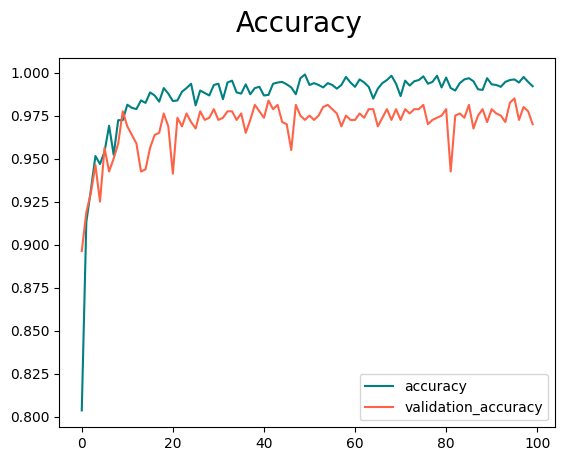

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='tomato', label='validation_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")

plt.show()

Evaluate Performace

4.1 Evaluate

In [24]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalCrossentropy, F1Score, FalseNegatives

In [25]:
precision = Precision()
recall = Recall()
cat_crossentropy = CategoricalCrossentropy()
falsenegatives = FalseNegatives()

In [26]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    yhat2 = [max(row) for row in yhat]
    precision.update_state(y,yhat2)
    recall.update_state(y, yhat2)
    cat_crossentropy.update_state(y, yhat2)
    falsenegatives.update_state(y,yhat2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


In [27]:
precision = precision.result().numpy()
recall = recall.result().numpy()
categ_crossentropy = cat_crossentropy.result().numpy()
F1Score = float(2 * (precision * recall) / (precision + recall))
FALSEnegatives = falsenegatives.result().numpy()
print('Precision:', precision)
print('Recall:', recall)
print('Crossentropy:', categ_crossentropy)
print('F1Score:', F1Score)
print('False negatives:', FALSEnegatives)


Precision: 0.875
Recall: 1.0
Crossentropy: 97.207634
F1Score: 0.9333333333333333
False negatives: 0.0


confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

model = tf.keras.models.load_model(r'C:\Users\pp01880\ML\Algo\models\CNNbestalgotest70.h5')
predictions = []
true_labels = []

# Loop pelos dados de teste e fazer previsões
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    
    yhat_labels = np.argmax(yhat, axis=1)
    predictions.extend(yhat_labels)
    true_labels.extend(y)

if predictions:
    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(true_labels, predictions)

    # Mostrar a matriz de confusão
    print(conf_matrix)
else:
    print("Não há previsões para calcular a matriz de confusão.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
[[ 46   0   0   0   0]
 [  0  76   0   0   0]
 [  0   0  85   0 

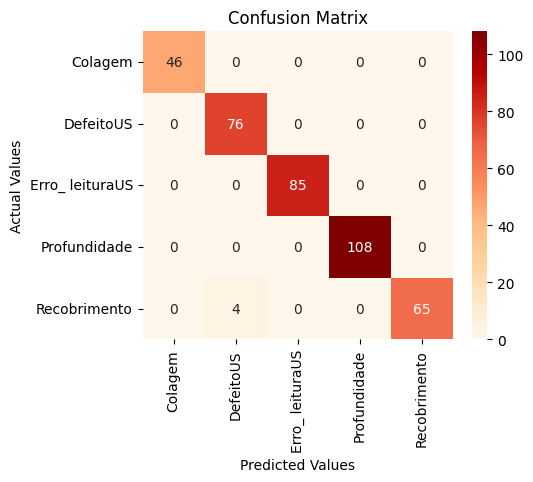

In [29]:
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Colagem', 'DefeitoUS', 'Erro_ leituraUS',  'Profundidade', 'Recobrimento'], 
                     columns = ['Colagem', 'DefeitoUS', 'Erro_ leituraUS',  'Profundidade', 'Recobrimento'])


plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='OrRd', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

4.2 Test

<function matplotlib.pyplot.show(close=None, block=None)>

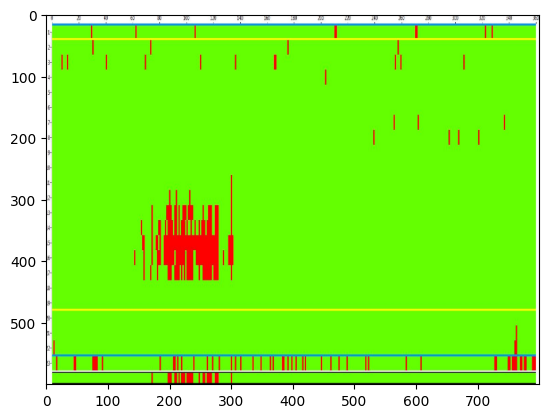

In [50]:
import cv2
import matplotlib.pyplot as plt
import os
model = tf.keras.models.load_model(r'C:\Users\pp01880\ML\Algo\models\CNNbestalgotest70.h5')
try:
    img = cv2.imread(r'C:\Users\pp01880\ML\Algo\Teste\DB45_4352RA031655491_CARTO_2023_07_06_12h16min04s.jpeg')

    if img is not None:  # Check if image is loaded successfully
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
    else:
        print("Error: Could not read image file.")
except Exception as e:
    print("An unexpected error occurred:", e)


resize = tf.image.resize(rgb_img, (600,800))
plt.imshow(resize.numpy().astype(int))
plt.show

In [51]:
np.expand_dims(resize,0).shape

(1, 600, 800, 3)

In [52]:
yhat3 = model.predict(np.expand_dims(resize/255,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [53]:
yhat3

array([[9.9916983e-01, 1.3836016e-06, 6.7313941e-04, 1.1004196e-06,
        1.5457037e-04]], dtype=float32)

Grad-CAM


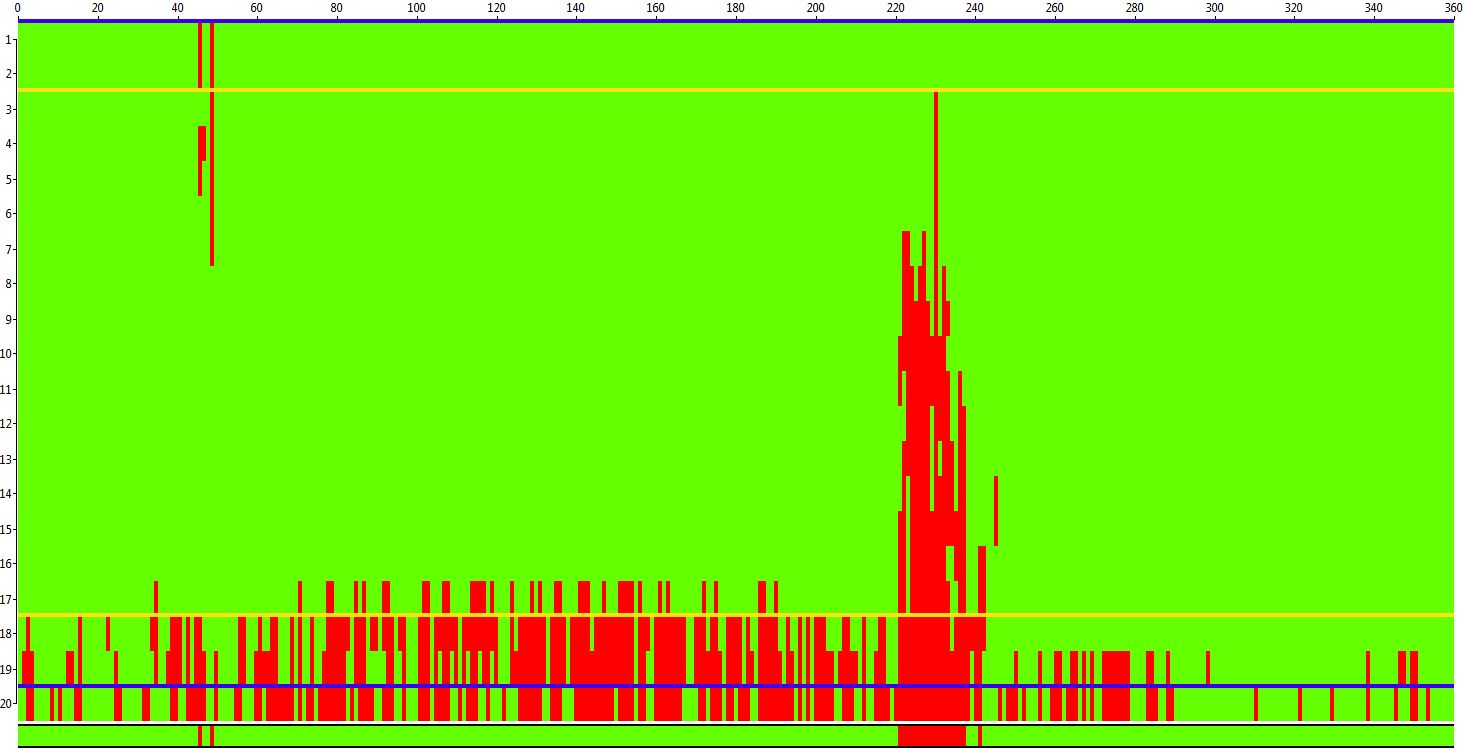

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/xception/xception_weights_tf_dim_ordering_tf_kernels.h5: None -- [Errno 11001] getaddrinfo failed

In [19]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

model_builder = keras.applications.xception.Xception
img_size = (500, 700)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d"

# The local path to our target image
img_path = keras.utils.get_file(
    r"C:\Users\pp01880\ML\Algo\Teste\JT4_4013RA940260123_CARTO_2024_02_06_04h25min12s.jpeg", r"C:\Users\pp01880\ML\Algo\Teste/Bvro0YD.png"
)

display(Image(img_path))

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

SHAP:Interpretation do test


In [ ]:
import shap
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(32,32)", x_test_mstar[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(3)))
ind=[600]
shap_values_ = explainer( x_test_mstar[ind], max_evals=5000, batch_size=50 )     
shap.image_plot(shap_values_,labels=[0,1,2])

In [4]:
import tensorflow as tf
import shap
import numpy as np
import matplotlib.pyplot as plt

# Carregue seu modelo TensorFlow
model = tf.keras.models.load_model(r'C:\Users\pp01880\ML\Algo\models\CNNbestalgotest66.h5')

# Carregue uma imagem de exemplo
image_path = r'C:\Users\pp01880\ML\Algo\Teste\JT4_4013RA540171228_CARTO_2024_01_27_18h38min21s.jpeg' 
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = tf.keras.applications.model.preprocess_input(image)



# Converta os dados para um formato suportado pelo SHAP (por exemplo, NumPy array)
data_np = np.array(data)

# Obtenha uma função explicadora para o modelo
explainer = shap.DeepExplainer(model, data_np)

# Calcule as explicações para a imagem
shap_values = explainer.shap_values(image)

# Interprete as explicações
# Visualize as explicações
shap.image_plot(shap_values, -image)

# Se desejar, você também pode plotar a imagem original
plt.imshow(image.squeeze())
plt.axis('off')
plt.show()


AttributeError: module 'keras.applications' has no attribute 'model'

In [ ]:
# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", x[2].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=labels)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    x[1:2], max_evals=500, batch_size=8, #outputs=shap.Explanation.argsort.flip[:5]
)
shap.image_plot(shap_values)

try 2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Carregar o seu modelo pré-treinado
model = tf.keras.models.load_model(r'C:\Users\pp01880\ML\Algo\models\CNNbestalgotest59.h5')  # Substitua pelo caminho do seu modelo

# Escolha a camada de convolução anterior à camada de saída que você deseja interpretar
target_layer_name = 'conv2d'  # Substitua pelo nome da camada no seu modelo

# Definir o modelo que inclui todas as camadas até a camada alvo
grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(target_layer_name).output, model.output])

# Função para gerar o Grad-CAM
def generate_grad_cam(img_path, class_index, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizar os pixels entre 0 e 1

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = model(img_array)
        class_output = preds[:, class_index]

    grads = tape.gradient(class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap.numpy()

# Caminho para a imagem de entrada
img_path = r'C:\Users\pp01880\ML\Algo\Teste\JT4_4013RA540171228_CARTO_2024_01_27_18h38min21s.jpeg'  # Substitua pelo caminho da sua imagem

# Classe alvo (índice da classe para a qual você deseja gerar o Grad-CAM)
class_index = 1  # Substitua pelo índice da classe alvo no seu modelo

# Gerar o Grad-CAM
heatmap = generate_grad_cam(img_path, class_index, grad_model)

# Carregar a imagem original
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

# Normalizar o mapa de calor para visualização
heatmap = np.uint8(255 * heatmap)
heatmap = np.expand_dims(heatmap, axis=-1)
heatmap = np.tile(heatmap, (1, 1, 3))

# Superpor a imagem original com o mapa de calor
superimposed_img = heatmap * 0.4 + img_array
superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

# Plotar a imagem original e o Grad-CAM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('Grad-CAM')
plt.axis('off')

plt.show()


ValueError: The layer sequential_1 has never been called and thus has no defined output.

Save Model

In [30]:
from tensorflow.keras.models import load_model


In [31]:
model.save(os.path.join('models','CNNbestalgotest71.h5'))